# Sistema tipo Lorenz
Se trata de un sistema dinámico determinista tridimensional no lineal derivado de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la atmósfera terrestre.
Para los siguientes valores de los parámetros $\sigma = 10$ , $\rho = 28$, $b = \frac{8}{3}$, el sistema exhibe un comportamiento caótico y muestra lo que actualmente se llama un atractor extraño.

El sistema es:
\begin{align*}
    x' &= \sigma( y - x)\\
    y' &= \rho x - y - xz\\
    z' &= xy - bz
\end{align*}
A continuación se simularán 1000 estados del atractor de Lorenz para luego usar un punto dentro del atractor como nueva condición inicial a estimar, usando la metodologia de los problemas inversos; en otras palabras, el objetivo es construir una distribución posterior de $\theta = (x(0), y(0), z(0))$ dadas observaciones $x(t_i)$, $y(t_i)$, $z(t_i)$ para $i=1000,...,n$
# Diseño de los datos
Se inicia tomando los puntos $(x(0)=1, y(0)=1, z(0)=1)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
import random

random.seed(2021) # fix random number generator

In [2]:

class forward_mapping:
    """
    esta clase simula el modelo directo y el operador de observación
    """
    def __init__(self, sigma = 10.0, rho = 28.0, beta = 8.0/3.0):
        """
        parámetros conocidos
        """
        self.sigma = sigma
        self.rho = rho
        self.beta = beta      
        self.t_data = np.arange(0.0, 5.0, 0.1)
        self.t_inicio = np.arange(0.0, 1000.0, 0.01)
    
    def rhs(self,w,t):
        """ lado derecho de la ecuacion """
        return [self.sigma*(w[1] - w[0]),
                self.rho*w[0] - w[1] - w[0]*w[2],
                w[0]*w[1] - self.beta*w[2]]
    
    def jac(self,w,t):
        """
        Evaluate Jacobian of the Lorenz system right hand side
        """
        return [[-self.sigma,self.sigma,0],
                [self.rho-w[2],-1,-w[0]],
                [w[1],w[0],-self.beta]]

    def get_inicio(self):
        """ integrar la ecuacion """
        x0 = [1,1,1]
        return integrate.odeint(self.rhs,x0,self.t_inicio, Dfun=self.jac)[-1,:]
    
    def simulacion(self,p):
        """ simular desde un punto """
        soln = integrate.odeint(self.rhs,p,self.t_data, Dfun=self.jac)
        return soln
    
    def make_data(self):
        """
        Generate data
        """
        self.iv = self.get_inicio()
        soln = integrate.odeint(self.rhs,self.iv,self.t_data,Dfun=self.jac)
        self.std = soln.max(axis=0)/10.0**2
        soln += self.std*np.random.randn(50,3)
        return soln
    

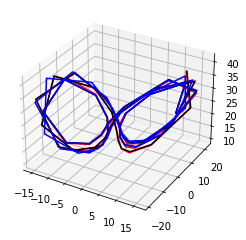

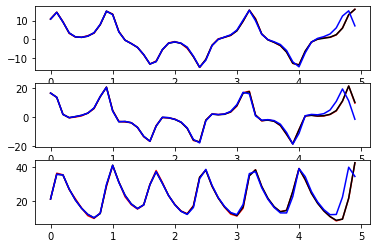

In [15]:
random.seed(2021)

if __name__ == "__main__":
    
    fm = forward_mapping() #initialize class
    data = fm.make_data()  # make synthetic data
    true_p = fm.get_inicio()   # get the true initial value 
    soln = fm.simulacion(true_p) # solve the ivp for the true value
    random_p = true_p+10**-2*np.random.randn(3) # random perturbation of iv
    random_soln = fm.simulacion(random_p) # solve the ivp for the perturbed iv    
    ax = plt.figure().add_subplot(projection='3d')
    fig, axs = plt.subplots(3)         
    ax.plot(data[:, 0], data[:, 1], data[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    ax.plot(random_soln[:, 0], random_soln[:, 1], random_soln[:, 2],'b') #perturbed       
    axs[0].plot(fm.t_data,data[:,0],'r')
    axs[0].plot(fm.t_data,soln[:,0],'k')    
    axs[0].plot(fm.t_data,random_soln[:,0],'b')        
    axs[1].plot(fm.t_data,data[:,1],'r')
    axs[1].plot(fm.t_data,soln[:,1],'k')    
    axs[1].plot(fm.t_data,random_soln[:,1],'b')        
    axs[2].plot(fm.t_data,data[:,2],'r')
    axs[2].plot(fm.t_data,soln[:,2],'k')    
    axs[2].plot(fm.t_data,random_soln[:,2],'b')        
    plt.show()

El punto inicial a estimar es el siguiente:

In [16]:
print(true_p)

[10.77465187 16.63729361 21.2932752 ]


In [17]:
print(random_p)

[10.76861478 16.62026662 21.29313144]


In [18]:
print(soln)

[[ 10.77465187  16.63729361  21.2932752 ]
 [ 14.40596133  13.6955807   35.65426958]
 [  9.19417357   1.77131088  35.21452801]
 [  3.32291714  -0.46871885  27.06963832]
 [  1.18788757   0.29219348  20.70383461]
 [  0.93222821   1.16047745  15.91813333]
 [  1.56007704   2.63939989  12.39096697]
 [  3.37232123   6.15681377  10.41261826]
 [  7.773729    14.08059559  12.8815271 ]
 [ 14.96548815  20.75875798  29.22262309]
 [ 13.34967387   4.45005169  40.90554537]
 [  3.98430853  -3.30552611  31.08514559]
 [ -0.58880072  -3.13209928  23.45579278]
 [ -2.4154733   -4.00458311  18.46295228]
 [ -4.45575375  -7.218035    15.80669178]
 [ -8.35505961 -13.42498735  17.94817839]
 [-13.38433076 -16.79526907  29.58323376]
 [-12.10312713  -6.36069961  37.0565205 ]
 [ -5.6832473   -0.27421866  30.41560763]
 [ -2.24243581  -0.516066    23.35682763]
 [ -1.56022581  -1.67930164  18.05089175]
 [ -2.2798112   -3.62739374  14.25215779]
 [ -4.52794722  -7.90998774  12.5954606 ]
 [ -9.4930964  -16.0028539   17.09

# Modelo Bayesiano
Para la estimación de las condiciones iniciales a través de inferencia bayesiana se usará un modelo a priori normal trivariado y función objetivo normal multivariado. Los parámetros se asumen independientes, por lo tanto sus matrices de covarianza son diagonales.

In [3]:
import pytwalk
from scipy import integrate
from xlrd import open_workbook
import scipy.stats as ss
import numpy as np
import scipy as sp
import random
import corner
import matplotlib.pyplot as plt


In [24]:
if __name__=="__main__":
    
    # inicializa la clase
    fm = forward_mapping()
    data = fm.make_data()
    
    def lprior(p):
        mu = np.array([10,15,20])
        cov = np.diag([20,20,20])
        return ss.multivariate_normal.logpdf(p,mean=mu,cov=cov)
    
    def llikelihood(p):
        soln = fm.simulacion(p)
        cov = np.diag(soln.max(axis=0)/10.0**2)
        return np.sum(ss.multivariate_normal.logpdf(data-soln,mean=np.zeros(3),cov=cov))
        
    def energy(p):
        fx = -lprior(p) - llikelihood(p)
        return fx

    def support(p):
        """ soporte de los parametros """
        rt = True
        rt &= (-40.0 < p[0] < 40.0)
        rt &= (-50.0 < p[1] < 50.0)
        rt &= (-10.0 < p[2] < 60.0)
        return rt

    def init():
        """ inicializacion de los parametros """
        p = np.zeros(3)
        p[0] = np.random.uniform(low=8.0,high=12.0)
        p[1] = np.random.uniform(low=14.0,high=17.0)
        p[2] = np.random.uniform(low=18.0,high=23.0)
        return p
    
    # haz una cadema de Markov con el twalk
    LorMCMC = pytwalk.pytwalk(n=3,U=energy,Supp=support)
    LorMCMC.Run(T=400000,x0=init(),xp0=init())

pytwalk: Running the twalk with 400000 iterations .  Wed, 10 Nov 2021, 17:18:01.
       Finish by Wed, 10 Nov 2021, 19:02.


C:\Users\sanch\OneDrive\Documentos\Material Cursos\Beyond Research\Codigos Sesiones\pytwalk.py:304: RuntimeWarning: overflow encountered in exp
  A = exp(up - up_prop)
C:\Users\sanch\OneDrive\Documentos\Material Cursos\Beyond Research\Codigos Sesiones\pytwalk.py:318: RuntimeWarning: overflow encountered in exp
  A = exp(u - u_prop)
C:\Users\sanch\OneDrive\Documentos\Material Cursos\Beyond Research\Codigos Sesiones\pytwalk.py:360: RuntimeWarning: overflow encountered in exp
  A = exp((u - u_prop) +  (self.nphi-2)*log(beta))


pytwalk:       2048 iterations so far. Finish by Wed, 10 Nov 2021, 19:01.
pytwalk:       6144 iterations so far. Finish by Wed, 10 Nov 2021, 19:01.
pytwalk:      14336 iterations so far. Finish by Wed, 10 Nov 2021, 19:00.
pytwalk:      30720 iterations so far. Finish by Wed, 10 Nov 2021, 18:58.
pytwalk:      62464 iterations so far. Finish by Wed, 10 Nov 2021, 18:59.
pytwalk:     125952 iterations so far. Finish by Wed, 10 Nov 2021, 18:59.
pytwalk:     291840 iterations so far. Finish by Wed, 10 Nov 2021, 18:45.
pytwalk: finished, Wed, 10 Nov 2021, 18:36:31.


## Gráfica de la función objetivo

Acceptance rates for the Walk, Traverse, Blow and Hop kernels:[0.00309316 0.04202056 0.00075976 0.        ]
Global acceptance rate: 0.02221
AutoMaxlag: maxlag= 8559.
Integrated Autocorrelation Time:   853.7, IAT/n:   284.6


matrix([[853.74860826]])

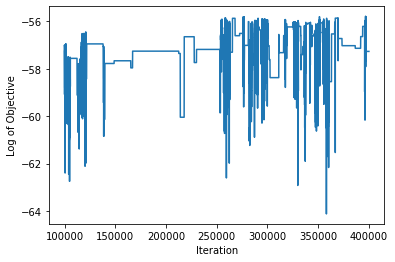

In [27]:
burnin = 100000
plt.figure()
LorMCMC.Ana(start=burnin)


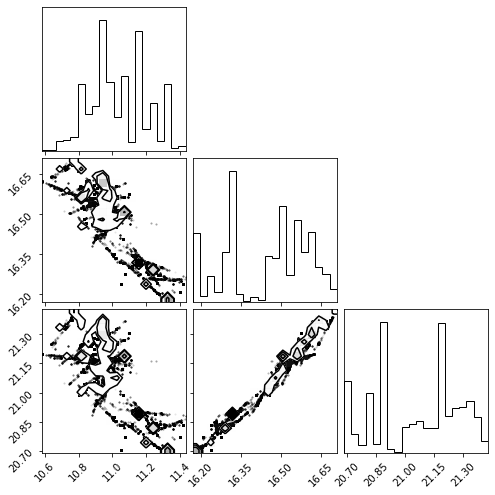

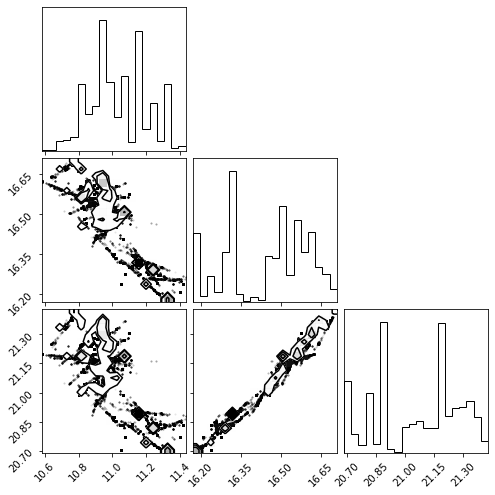

In [29]:
corner.corner(LorMCMC.Output[burnin:,:-1])

## Distribuciones posteriores marginales
Los resultados son satisfactorios pues las regiones de probabilidad incluyen el valor real de la condición inicial.
### X(0)

La media posterior de x(0) es  11.128652325679386
El límite inferior de la region de probabilidad para x(0) es  10.782776887561655
El límite superior de la region de probabilidad para x(0) es  11.511240084504447


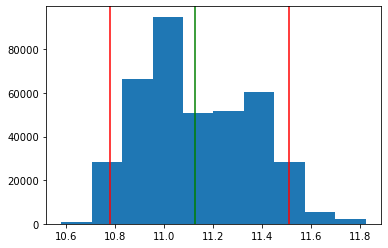

In [32]:
#x(0)
x_0 = LorMCMC.Output[10000:, 0]
plt.hist(x_0)
plt.axvline(x = np.mean(x_0), color="green")
plt.axvline(x = np.percentile(x_0, 97.5), color="red")
plt.axvline(x = np.percentile(x_0, 2.5), color="red")
print("La media posterior de x(0) es", "",np.mean(x_0))
print("El límite inferior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 2.5))
print("El límite superior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 97.5))


### Y(0)

La media posterior de y(0) es  16.372352783428898
El límite inferior de la region de probabilidad para y(0) es  16.02435968438545
El límite superior de la region de probabilidad para y(0) es  16.67000318312559


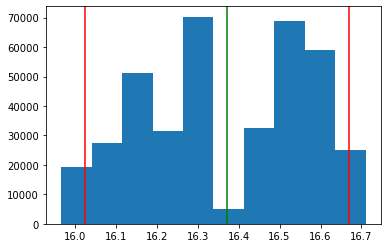

In [33]:
#y(0)
y_0 = LorMCMC.Output[10000:, 1]
plt.hist(y_0)
plt.axvline(x = np.mean(y_0), color="green")
plt.axvline(x = np.percentile(y_0, 97.5), color="red")
plt.axvline(x = np.percentile(y_0, 2.5), color="red")
print("La media posterior de y(0) es", "",np.mean(y_0))
print("El límite inferior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 2.5))
print("El límite superior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 97.5))


### Z(0)

La media posterior de z(0) es  20.962202977626426
El límite inferior de la region de probabilidad para z(0) es  20.49757173596829
El límite superior de la region de probabilidad para z(0) es  21.374661200009825


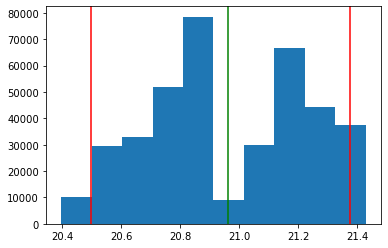

In [36]:
#z(0)
z_0 = LorMCMC.Output[10000:, 2]
plt.hist(z_0)
plt.axvline(x = np.mean(z_0), color="green")
plt.axvline(x = np.percentile(z_0, 97.5), color="red")
plt.axvline(x = np.percentile(z_0, 2.5), color="red")
print("La media posterior de z(0) es", "",np.mean(z_0))
print("El límite inferior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 2.5))
print("El límite superior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 97.5))


## Estimación de los datos dentro del atractor

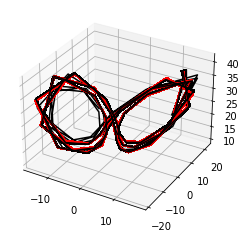

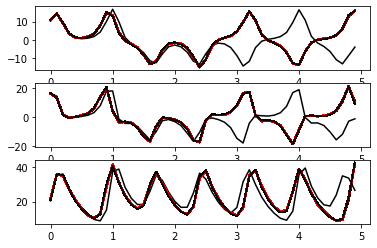

In [31]:
ax = plt.figure().add_subplot(projection='3d')
fig, axs = plt.subplots(3)           
for k in np.arange(5000):
    soln = fm.simulacion(LorMCMC.Output[-k*10,:-1])
    ax.plot(data[:, 0], data[:, 1], data[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    axs[0].plot(fm.t_data,data[:,0],'r')
    axs[0].plot(fm.t_data,soln[:,0],'k')        
    axs[1].plot(fm.t_data,data[:,1],'r')
    axs[1].plot(fm.t_data,soln[:,1],'k')    
    axs[2].plot(fm.t_data,data[:,2],'r')
    axs[2].plot(fm.t_data,soln[:,2],'k')    
    #plt.savefig('samples_vs_data.png')

# Modelo Bayesiano 2
Segundo modelo donde el cambio frente al primero es la ubicación del punto inicial, vemos que le toma a la cadena más tiempo encontrar el equilibrio y por lo tanto genera menos muestras significativas con la misma cantidad de iteraciones.

In [4]:
if __name__=="__main__":
    
    # inicializa la clase
    fm = forward_mapping()
    data = fm.make_data()
    
    def lprior(p):
        mu = np.array([10,15,20])
        cov = np.diag([20,20,20])
        return ss.multivariate_normal.logpdf(p,mean=mu,cov=cov)
    
    def llikelihood(p):
        soln = fm.simulacion(p)
        cov = np.diag(soln.max(axis=0)/10.0**2)
        return np.sum(ss.multivariate_normal.logpdf(data-soln,mean=np.zeros(3),cov=cov))
        
    def energy(p):
        fx = -lprior(p) - llikelihood(p)
        return fx

    def support(p):
        """ soporte de los parametros """
        rt = True
        rt &= (-40.0 < p[0] < 40.0)
        rt &= (-50.0 < p[1] < 50.0)
        rt &= (-10.0 < p[2] < 60.0)
        return rt

    def init():
        """ inicializacion de los parametros """
        p = np.zeros(3)
        p[0] = np.random.uniform(low=4.0,high=6.0)
        p[1] = np.random.uniform(low=9.0,high=13.0)
        p[2] = np.random.uniform(low=14.0,high=18.0)
        return p
    
    # haz una cadema de Markov con el twalk
    LorMCMC = pytwalk.pytwalk(n=3,U=energy,Supp=support)
    LorMCMC.Run(T=400000,x0=init(),xp0=init())

pytwalk: Running the twalk with 400000 iterations .  Thu, 11 Nov 2021, 15:39:27.
       Finish by Thu, 11 Nov 2021, 19:18.


C:\Users\sanch\OneDrive\Documentos\Material Cursos\Beyond Research\Codigos Sesiones\pytwalk.py:318: RuntimeWarning: overflow encountered in exp
  A = exp(u - u_prop)
C:\Users\sanch\OneDrive\Documentos\Material Cursos\Beyond Research\Codigos Sesiones\pytwalk.py:343: RuntimeWarning: overflow encountered in exp
  A = exp((up - up_prop) +  (self.nphi-2)*log(beta))
C:\Users\sanch\OneDrive\Documentos\Material Cursos\Beyond Research\Codigos Sesiones\pytwalk.py:360: RuntimeWarning: overflow encountered in exp
  A = exp((u - u_prop) +  (self.nphi-2)*log(beta))
C:\Users\sanch\OneDrive\Documentos\Material Cursos\Beyond Research\Codigos Sesiones\pytwalk.py:304: RuntimeWarning: overflow encountered in exp
  A = exp(up - up_prop)
C:\Users\sanch\OneDrive\Documentos\Material Cursos\Beyond Research\Codigos Sesiones\pytwalk.py:380: RuntimeWarning: overflow encountered in exp
  A = exp((up - up_prop) + (W1 - W2))


pytwalk:       5120 iterations so far. Finish by Thu, 11 Nov 2021, 16:19.
pytwalk:      16384 iterations so far. Finish by Thu, 11 Nov 2021, 16:18.
pytwalk:      37888 iterations so far. Finish by Thu, 11 Nov 2021, 16:17.
pytwalk:      79872 iterations so far. Finish by Thu, 11 Nov 2021, 16:17.
pytwalk:     160768 iterations so far. Finish by Thu, 11 Nov 2021, 16:18.
pytwalk:     342016 iterations so far. Finish in approx. 5 min and 23 sec.
pytwalk: finished, Thu, 11 Nov 2021, 16:16:19.


## Gráfica de función objetivo

Acceptance rates for the Walk, Traverse, Blow and Hop kernels:[0.00433797 0.07082612 0.00121895 0.        ]
Global acceptance rate: 0.03692
AutoMaxlag: Warning: maxlag= 26003 > min(T//2,maxmaxlag=20000), fixing it to 20000
Integrated Autocorrelation Time:   528.1, IAT/n:   176.0


matrix([[528.11777986]])

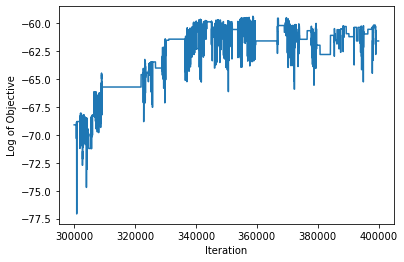

In [6]:
burnin = 300000
plt.figure()
LorMCMC.Ana(start=burnin)


## Distribuciones marginales posteriores
Los resultados no son tan buenos como el primer modelo en términos de que x(0) y z(0) no incluyen en sus regiones de probabilidad al valor real de la condición inicial, sin embargo son cercanos.
### X(0)

La media posterior de x(0) es  11.52109641932956
El límite inferior de la region de probabilidad para x(0) es  11.061254033114556
El límite superior de la region de probabilidad para x(0) es  11.99253836063205


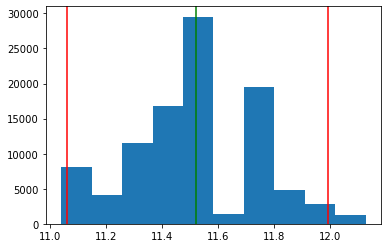

In [8]:
#x(0)
x_0 = LorMCMC.Output[burnin:, 0]
plt.hist(x_0)
plt.axvline(x = np.mean(x_0), color="green")
plt.axvline(x = np.percentile(x_0, 97.5), color="red")
plt.axvline(x = np.percentile(x_0, 2.5), color="red")
print("La media posterior de x(0) es", "",np.mean(x_0))
print("El límite inferior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 2.5))
print("El límite superior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 97.5))


### Y(0)

La media posterior de y(0) es  16.006222656367147
El límite inferior de la region de probabilidad para y(0) es  15.555560606256156
El límite superior de la region de probabilidad para y(0) es  16.236707505846212


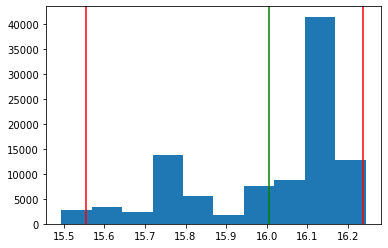

In [10]:
#y(0)
y_0 = LorMCMC.Output[burnin:, 1]
plt.hist(y_0)
plt.axvline(x = np.mean(y_0), color="green")
plt.axvline(x = np.percentile(y_0, 97.5), color="red")
plt.axvline(x = np.percentile(y_0, 2.5), color="red")
print("La media posterior de y(0) es", "",np.mean(y_0))
print("El límite inferior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 2.5))
print("El límite superior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 97.5))


### Z(0)

La media posterior de z(0) es  20.489230414364513
El límite inferior de la region de probabilidad para z(0) es  19.943216323341893
El límite superior de la region de probabilidad para z(0) es  20.72820051654785


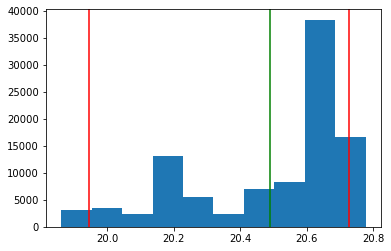

In [11]:
#z(0)
z_0 = LorMCMC.Output[burnin:, 2]
plt.hist(z_0)
plt.axvline(x = np.mean(z_0), color="green")
plt.axvline(x = np.percentile(z_0, 97.5), color="red")
plt.axvline(x = np.percentile(z_0, 2.5), color="red")
print("La media posterior de z(0) es", "",np.mean(z_0))
print("El límite inferior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 2.5))
print("El límite superior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 97.5))


## Estimación de los datos del atractor

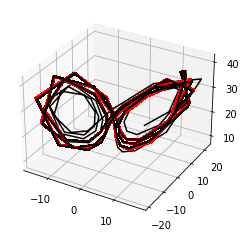

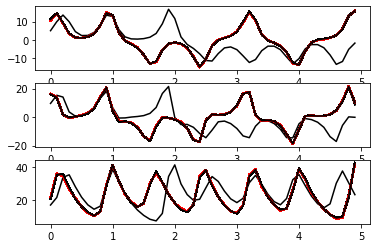

In [12]:
ax = plt.figure().add_subplot(projection='3d')
fig, axs = plt.subplots(3)           
for k in np.arange(5000):
    soln = fm.simulacion(LorMCMC.Output[-k*10,:-1])
    ax.plot(data[:, 0], data[:, 1], data[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    axs[0].plot(fm.t_data,data[:,0],'r')
    axs[0].plot(fm.t_data,soln[:,0],'k')        
    axs[1].plot(fm.t_data,data[:,1],'r')
    axs[1].plot(fm.t_data,soln[:,1],'k')    
    axs[2].plot(fm.t_data,data[:,2],'r')
    axs[2].plot(fm.t_data,soln[:,2],'k')    


# Modelo Bayesiano 3

Similar al primer modelo bayesiano, se adicionan cambios en la covarianza del modelo a priori, ya no es una misma varianza para los tres parámetros.

In [13]:
if __name__=="__main__":
    
    # inicializa la clase
    fm = forward_mapping()
    data = fm.make_data()
    
    def lprior(p):
        mu = np.array([10,15,20])
        cov = np.diag([10,20,30])
        return ss.multivariate_normal.logpdf(p,mean=mu,cov=cov)
    
    def llikelihood(p):
        soln = fm.simulacion(p)
        cov = np.diag(soln.max(axis=0)/10.0**2)
        return np.sum(ss.multivariate_normal.logpdf(data-soln,mean=np.zeros(3),cov=cov))
        
    def energy(p):
        fx = -lprior(p) - llikelihood(p)
        return fx

    def support(p):
        """ soporte de los parametros """
        rt = True
        rt &= (-40.0 < p[0] < 40.0)
        rt &= (-50.0 < p[1] < 50.0)
        rt &= (-10.0 < p[2] < 60.0)
        return rt

    def init():
        """ inicializacion de los parametros """
        p = np.zeros(3)
        p[0] = np.random.uniform(low=8.0,high=12.0)
        p[1] = np.random.uniform(low=14.0,high=17.0)
        p[2] = np.random.uniform(low=18.0,high=23.0)
        return p
    
    # haz una cadema de Markov con el twalk
    LorMCMC = pytwalk.pytwalk(n=3,U=energy,Supp=support)
    LorMCMC.Run(T=400000,x0=init(),xp0=init())

pytwalk: Running the twalk with 400000 iterations .  Thu, 11 Nov 2021, 17:38:12.
        


C:\Users\sanch\OneDrive\Documentos\Material Cursos\Beyond Research\Codigos Sesiones\pytwalk.py:304: RuntimeWarning: overflow encountered in exp
  A = exp(up - up_prop)
C:\Users\sanch\OneDrive\Documentos\Material Cursos\Beyond Research\Codigos Sesiones\pytwalk.py:318: RuntimeWarning: overflow encountered in exp
  A = exp(u - u_prop)
C:\Users\sanch\OneDrive\Documentos\Material Cursos\Beyond Research\Codigos Sesiones\pytwalk.py:343: RuntimeWarning: overflow encountered in exp
  A = exp((up - up_prop) +  (self.nphi-2)*log(beta))


pytwalk:       6144 iterations so far. Finish by Thu, 11 Nov 2021, 18:15.
pytwalk:      16384 iterations so far. Finish by Thu, 11 Nov 2021, 18:16.
pytwalk:      36864 iterations so far. Finish by Thu, 11 Nov 2021, 18:18.
pytwalk:      77824 iterations so far. Finish by Thu, 11 Nov 2021, 18:17.
pytwalk:     160768 iterations so far. Finish by Thu, 11 Nov 2021, 18:17.
pytwalk:     317440 iterations so far. Finish by Thu, 11 Nov 2021, 18:18.
pytwalk: finished, Thu, 11 Nov 2021, 18:19:20.


## Gráfica de la función objetivo

Acceptance rates for the Walk, Traverse, Blow and Hop kernels:[0.00380557 0.03781485 0.00090293 0.        ]
Global acceptance rate: 0.02049
AutoMaxlag: maxlag= 11109.
Integrated Autocorrelation Time:   764.9, IAT/n:   255.0


matrix([[764.94566461]])

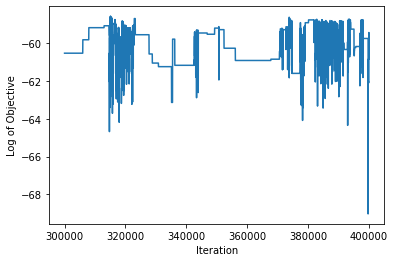

In [15]:
burnin = 300000
plt.figure()
LorMCMC.Ana(start=burnin)


## Distribuciones marginales posteriores
Los resultados son satisfactorios nuevamente ya que las regiones de probabilidad capturan los valores reales de la condición inicial.

### X(0)

La media posterior de x(0) es  10.391862179746633
El límite inferior de la region de probabilidad para x(0) es  10.214841065864704
El límite superior de la region de probabilidad para x(0) es  10.630342380093156


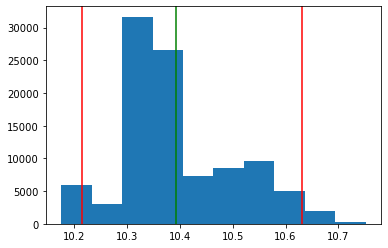

In [16]:
#x(0)
x_0 = LorMCMC.Output[burnin:, 0]
plt.hist(x_0)
plt.axvline(x = np.mean(x_0), color="green")
plt.axvline(x = np.percentile(x_0, 97.5), color="red")
plt.axvline(x = np.percentile(x_0, 2.5), color="red")
print("La media posterior de x(0) es", "",np.mean(x_0))
print("El límite inferior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 2.5))
print("El límite superior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 97.5))


### Y(0)

La media posterior de y(0) es  16.89527872280837
El límite inferior de la region de probabilidad para y(0) es  16.743480631298482
El límite superior de la region de probabilidad para y(0) es  17.07093699189247


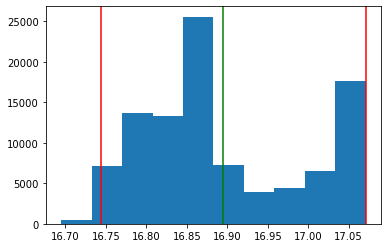

In [17]:
#y(0)
y_0 = LorMCMC.Output[burnin:, 1]
plt.hist(y_0)
plt.axvline(x = np.mean(y_0), color="green")
plt.axvline(x = np.percentile(y_0, 97.5), color="red")
plt.axvline(x = np.percentile(y_0, 2.5), color="red")
print("La media posterior de y(0) es", "",np.mean(y_0))
print("El límite inferior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 2.5))
print("El límite superior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 97.5))


### Z(0)

La media posterior de z(0) es  21.62569739651983
El límite inferior de la region de probabilidad para z(0) es  21.40199336792872
El límite superior de la region de probabilidad para z(0) es  21.92590205996478


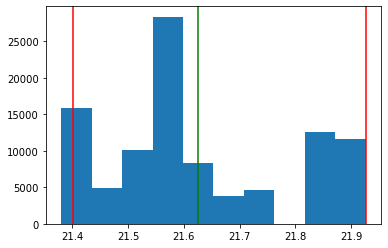

In [18]:
#z(0)
z_0 = LorMCMC.Output[burnin:, 2]
plt.hist(z_0)
plt.axvline(x = np.mean(z_0), color="green")
plt.axvline(x = np.percentile(z_0, 97.5), color="red")
plt.axvline(x = np.percentile(z_0, 2.5), color="red")
print("La media posterior de z(0) es", "",np.mean(z_0))
print("El límite inferior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 2.5))
print("El límite superior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 97.5))


## Estimación de los datos del atractor

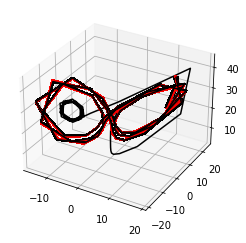

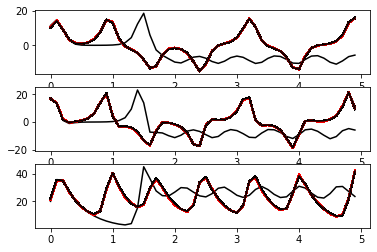

In [19]:
ax = plt.figure().add_subplot(projection='3d')
fig, axs = plt.subplots(3)           
for k in np.arange(5000):
    soln = fm.simulacion(LorMCMC.Output[-k*10,:-1])
    ax.plot(data[:, 0], data[:, 1], data[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    axs[0].plot(fm.t_data,data[:,0],'r')
    axs[0].plot(fm.t_data,soln[:,0],'k')        
    axs[1].plot(fm.t_data,data[:,1],'r')
    axs[1].plot(fm.t_data,soln[:,1],'k')    
    axs[2].plot(fm.t_data,data[:,2],'r')
    axs[2].plot(fm.t_data,soln[:,2],'k')    
